In [26]:
import numpy as np
from numpy.fft import fftn, ifftn, fftfreq
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot') #グラフのスタイル
plt.rcParams['figure.figsize'] = [12, 9] # グラフサイズ設定

In [27]:
estimate_from_mobile_data = np.load('/home/is/shuntaro-o/dev/persons_move_analysis/data/array_population_number_estimate/estimate_from_mobile_data.npy')
estimate_month7_Geo = np.load('/home/is/shuntaro-o/dev/persons_move_analysis/data/array_population_number_estimate/estimate_month7_Geo.npy')

In [28]:
estimate_from_mobile_data_flatten = estimate_from_mobile_data.flatten()
estimate_month7_Geo_flatten = estimate_month7_Geo.flatten()

In [29]:
normalization_estimate_from_mobile_data_flatten = stats.zscore(estimate_from_mobile_data_flatten)
normalization_estimate_month7_Geo_flatten = stats.zscore(estimate_month7_Geo_flatten)

In [30]:
columns = ['population']
df_mobile = pd.DataFrame(data=normalization_estimate_from_mobile_data_flatten, columns=columns, dtype='float')
df_Geo = pd.DataFrame(data=normalization_estimate_month7_Geo_flatten , columns=columns, dtype='float')

<AxesSubplot: title={'center': '2022/7 Estimated number of population(mobile data)'}, xlabel='hour'>

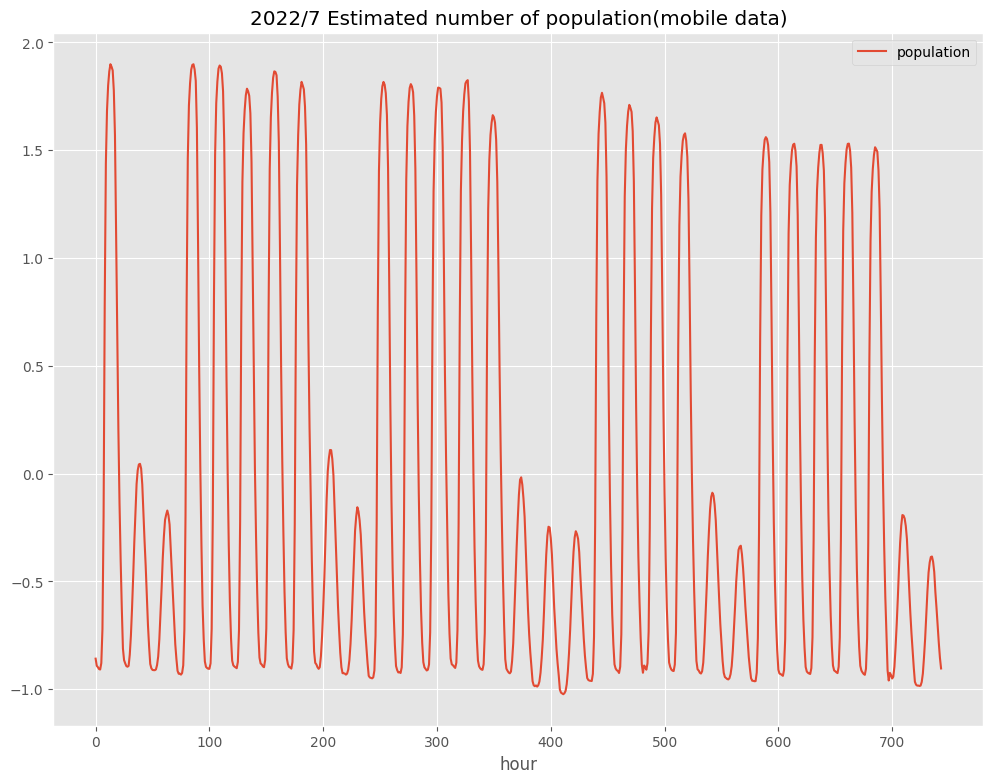

In [31]:
df_mobile.plot(title='2022/7 Estimated number of population(mobile data)',xlabel='hour')

<AxesSubplot: title={'center': '2022/7 Estimated number of population(mobile data)'}, xlabel='hour'>

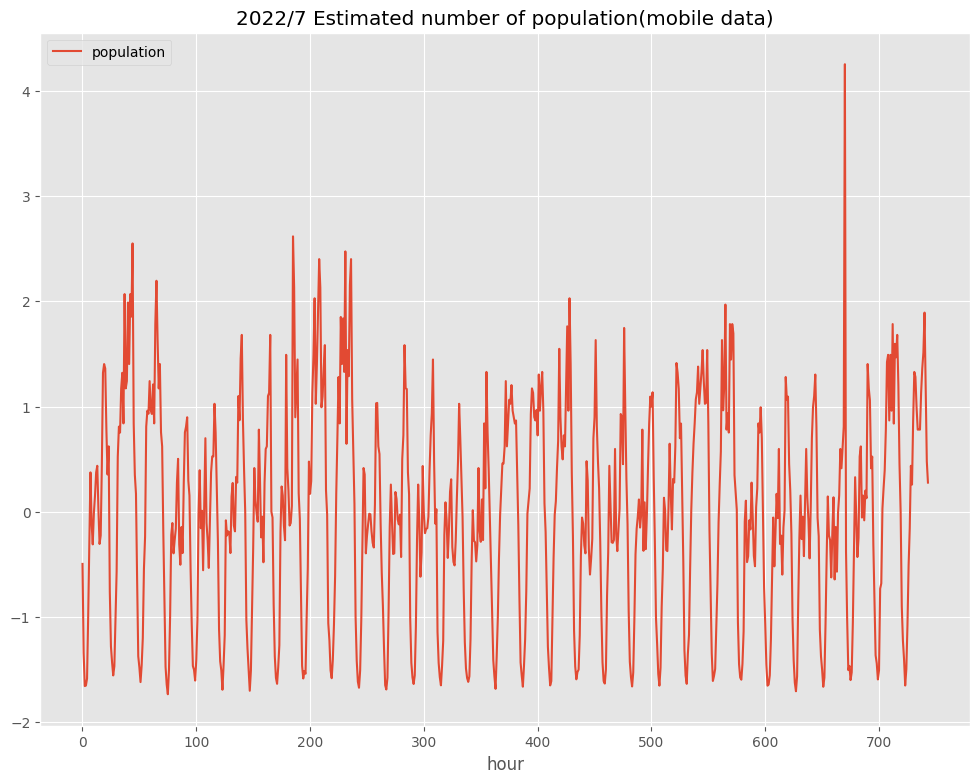

In [32]:
df_Geo.plot(title='2022/7 Estimated number of population(mobile data)',xlabel='hour')

In [40]:
N = 744


In [41]:
F = np.fft.fft(normalization_estimate_from_mobile_data_flatten)

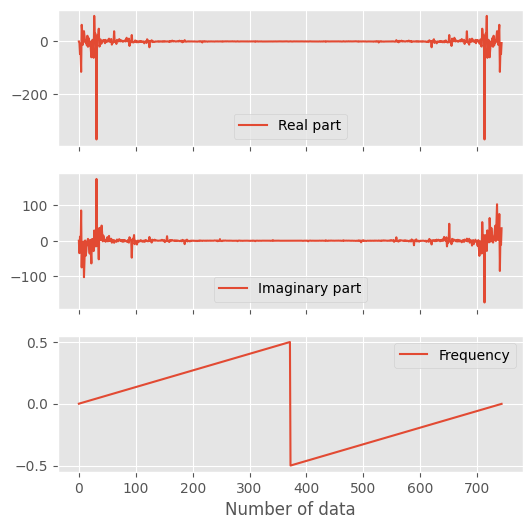

In [42]:
fig, ax = plt.subplots(nrows=3, sharex=True, figsize=(6,6))
freq = np.fft.fftfreq(N)
ax[0].plot(F.real, label="Real part")
ax[0].legend()
ax[1].plot(F.imag, label="Imaginary part")
ax[1].legend()
ax[2].plot(freq, label="Frequency")
ax[2].legend()
ax[2].set_xlabel("Number of data")
plt.show()

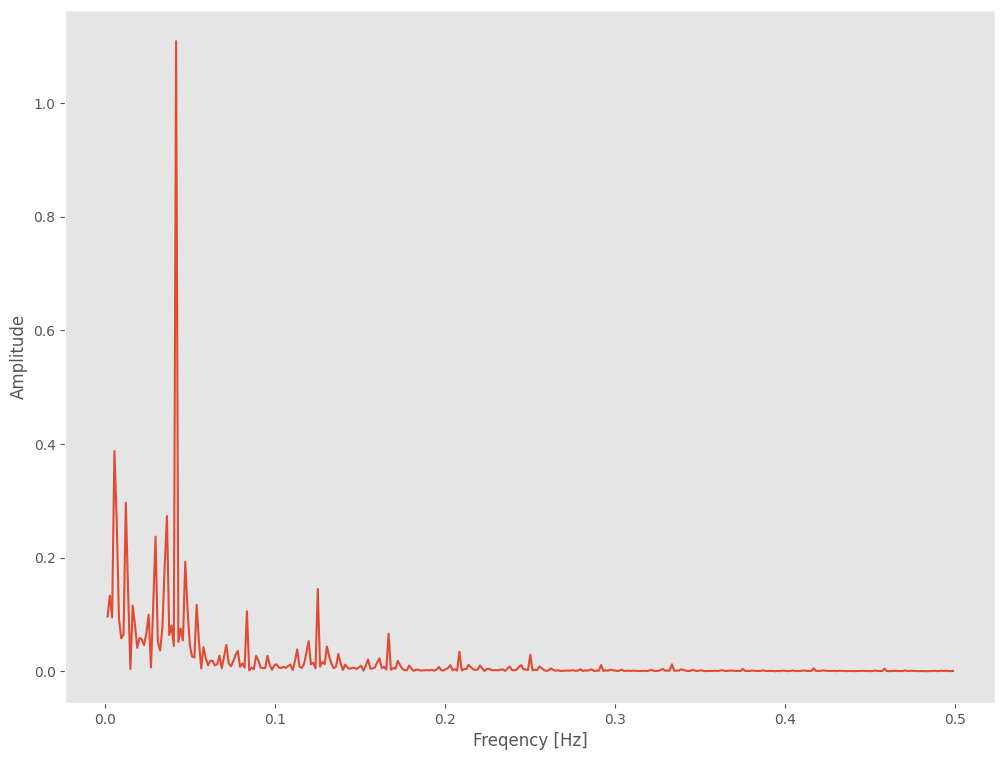

In [43]:
Amp = np.abs(F/(N/2)) # 振幅

fig, ax = plt.subplots()
ax.plot(freq[1:int(N/2)], Amp[1:int(N/2)])
ax.set_xlabel("Freqency [Hz]")
ax.set_ylabel("Amplitude")
ax.grid()
plt.show()